Atalov S. (TSI AUCA)

Introduction to Machine Learning and Artificial Intelligence

# Lab 2
## Numerical Computing And Gradient Descent (5 p)

-----

<div>
    <img src="https://www.mathworks.com/moler/chapters/_jcr_content/mainParsys/column_1/2/image_0.adapt.full.medium.png/1642102580164.png" width="300">
</div>

In [18]:
import numpy as np
from matplotlib import pyplot as plt

## Part 1. Math (1 p)

Find derivatives of the following functions: 

1. 
$$f(x) = 3x^3 - 2x^2 + 5x - 1$$

$$f'(x) = 9x^2 - 4x + 5$$


2.

$$g(x) = e^{2x}$$
$$g'(x)= 2e^{2x}$$

3.

$$p(x) = x^2 + 3wx - 7$$
$$p'(w)= 3w$$

4.

$$s(x) = x^5 + 2x^4 - x^3 - 3x^2 + x + 5c + 5$$
$$s'(x)=5x^4 + 8x^3 - 3x^2 - 6x + 1  $$

5.

$$k(x) = \ln(2x + 1)$$
$$k'(x)= 2/(2x+1)$$

---
## Part 2. Programming (4 p.)

### 2.1. Vector Vector dot product (1 p.)
The dot product is a mainstay of Linear Algebra and NumPy. This is an operation used extensively in this course and should be well understood. The dot product is shown below.

<img src="./images/Lab02_dot_notrans.gif" width=800> 

The dot product multiplies the values in two vectors element-wise and then sums the result.
Vector dot product requires the dimensions of the two vectors to be the same. 

Let's implement our own version of the dot product below:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [2]:
import numpy as np
def my_dot(a, b): 
    """
    Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    """
    try:
        res = 0
        for i in range(len(a)):
            res += a[i] * b[i]
        return res
    except ValueError:
        print("Размер неодинаковый")
    
    return 

In [16]:
a = np.array([1,2,3])
b = np.array([1,2,3])
my_dot(a,b)

14

In [17]:
# test
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])

assert my_dot(a,b) == np.dot(a,b), "Wrong!"

#### Testing the vector operations speed

Actually we can use `np.dot` for faster computations

In [3]:
import time
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

np.dot(a, b) =  2501072.5817
Vectorized version duration: 60.0014 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 2662.8945 ms 


So, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

### 2.2. Numerical computations ( 1 p.)

#### Function

There is a function:

$f(x) = x^2 - 4x + 4$

Let's implement this function in Python:

In [4]:
# Function definition
def f(x):
    return x*x-4*x+4

In [5]:
# test your code
assert f(5) == 9, "Wrong"
assert f(10) == 64, "Wrong"
print('Nice')

Nice


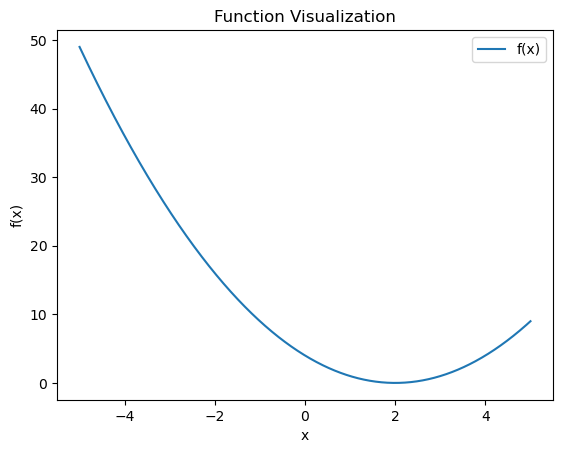

In [6]:
import matplotlib.pyplot as plt
# Visualize the function and extrema using Matplotlib
x_values = np.linspace(-5, 5, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x)')

plt.legend()
plt.title('Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### Function Derivative

Implement the function to calculate derivative of `f(x)`

$f(x) = x^2 - 4x + 4$

In [7]:
# Derivative of the function
def df(x) -> float:
    return 2*x-4

In [8]:
# test your code
assert df(5) == 6, "Wrong"
assert df(10) == 16, "Wrong"
print('Nice')

Nice




### 2.3. Understanding Gradient Descent 

In the world of mathematics, we often deal with functions, and finding the minimum or maximum of a function is a common problem. Let's consider a simple function `f(x)` as an example.

#### Key Concepts:

1. **The Function:**
   - $f(x)$ represents a mathematical function, where $x$ is the input variable.

2. **The Derivative (Slope):**
   - The derivative $f'(x)$ at a given point $x$ tells us the slope of the function at that point.
   - If $f'(x) > 0$, the function is going uphill; if $f'(x) < 0$, it's going downhill.

3. **Gradient (Vector of Derivatives):**
   - For functions with multiple variables, we talk about the gradient $\nabla f$, which is a vector containing all the partial derivatives.
   - Each component of the gradient points in the direction of the steepest ascent.

4. **Direction of Steepest Descent:**
   - The negative of the gradient $-\nabla f$ points in the direction of the steepest descent.
   - Moving in this direction helps us reach the minimum of the function.

5. **Taking Steps:**
   - The iterative update rule is given by: $x_{\text{new}} = x_{\text{old}} - \text{learning_rate} \times \nabla f(x_{\text{old}})$.
   - The learning rate is a small positive number, controlling the size of each step.

#### The Algorithm in Mathematical Terms:

1. **Start Somewhere:**
   - Choose an initial point $x_{\text{old}}$.

2. **Feel the Slope:**
   - Calculate the gradient $\nabla f(x_{\text{old}})$.

3. **Take a Step Downhill:**
   - Update your position: $x_{\text{new}} = x_{\text{old}} - \text{learning_rate} \times \nabla f(x_{\text{old}})$.

4. **Repeat:**
   - Continue steps 2 and 3 until convergence or a certain number of iterations.

#### Why "Gradient Descent"?

- "Gradient" refers to the vector of partial derivatives, $\nabla f$.
- "Descent" signifies moving in the direction opposite to the gradient to decrease the function value.

#### Mathematical Realization:

- **Update Rule:**
  - $x_{\text{new}} = x_{\text{old}} - \text{learning_rate} \times \nabla f(x_{\text{old}})$

- **Convergence:**
  - The process ideally converges to a minimum where $\nabla f = 0$.

#### Considerations for Success:

- **Learning Rate:**
  - Choose a learning rate ($\text{learning_rate}$) carefully to balance convergence speed and stability.

- **Initial Position:**
  - Different initial positions may lead to different local minima or maxima.

#### Real-World Analogy with Math:

In mathematical terms, you're calculating the slope at your current position, moving a small distance in the direction of the negative slope, and repeating this process until you reach a point where the slope is nearly zero. This mathematical maneuver is gradient descent, a fundamental optimization technique.

### PLEASE WATCH THIS VIDEO

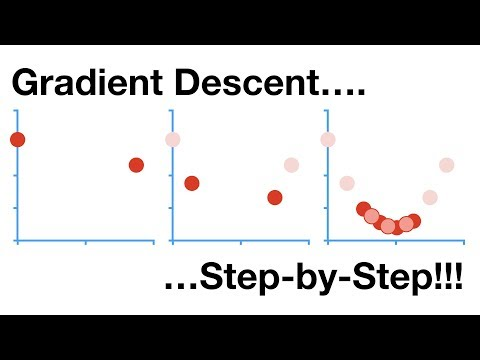

In [29]:
from IPython.display import YouTubeVideo

YouTubeVideo('sDv4f4s2SB8', width=800, height=500)

### 2.4. Gradient descent implementation (2 p.)

In [9]:
# Gradient Descent for finding minimum
from decimal import Decimal
def gradient_descent(f, df, x_init, learning_rate, num_iterations):
    """
    Find minima using gradient descent algorithm
 
    Args:
      f  (function):  your function 
      df (function):  your function to calculate derivative of the f
      x_init (int) :  initial x
      learning_rate (float) :  learning rate (alpha)
      num_iterations (int)  :  number of iterations
    
    Returns:
      x (scalar):  minimum x
    """
    lr = Decimal(f"{learning_rate}")
    x = x_init
    for i in range(num_iterations):
        x = x - learning_rate * df(x)
    return x

Minimum value: 0.0 at x = 1.9999999858579973


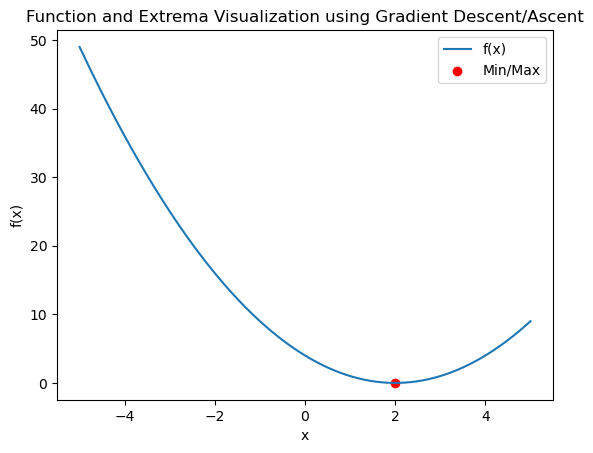

In [57]:
# Initial values
x_init_min = -5

learning_rate = 0.001
num_iterations = 10000

# Finding minimum using gradient descent
min_x = gradient_descent(f, df, x_init_min, learning_rate, num_iterations)
min_value = f(min_x)

# Print the results
print(f"Minimum value: {min_value} at x = {min_x}")

# Visualize the function and extrema using Matplotlib
x_values = np.linspace(-5, 5, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x)')
plt.scatter(min_x, min_value, color='red', label='Min/Max')
plt.legend()
plt.title('Function and Extrema Visualization using Gradient Descent/Ascent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()